# Importing (step 1)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing tables
path = r'C:\Users\Lenovo\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ord_prod.pkl'),)

#  bar chart, histogram, scatterplot, line chart (step 2)

In [8]:
# creating a bar chart

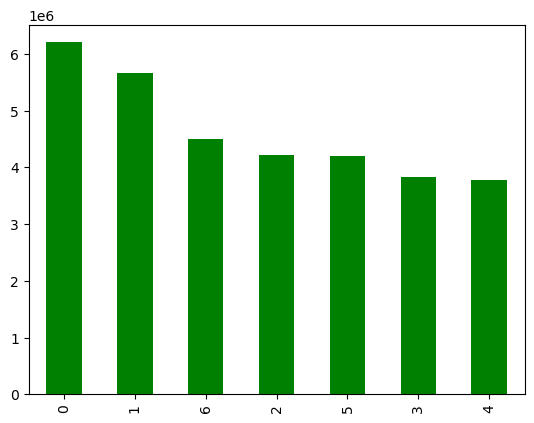

In [4]:
bar = df['order_day_of_week'].value_counts().plot.bar(color =['green'])

In [26]:
# exporting bar chart as png

In [25]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_ord_prod.png'))

In [33]:
# creating sample subset

In [34]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [36]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [37]:
np.random.rand(10)

array([0.25671372, 0.84661238, 0.46028703, 0.07224865, 0.12230286,
       0.24477454, 0.07346683, 0.71956928, 0.66409747, 0.64268552])

In [38]:
# creating big and small samples

In [39]:
big = df[dev]
small = df[~dev]

In [42]:
# checking samples 

In [40]:
len(df)

32406041

In [41]:
len(big) + len(small)

32406041

In [9]:
# creating a subset for next visualisations 

In [43]:
df_small = small[['order_day_of_week','prices']]

In [15]:
# creating histogram for fulldataframe and for subset

<Axes: ylabel='Frequency'>

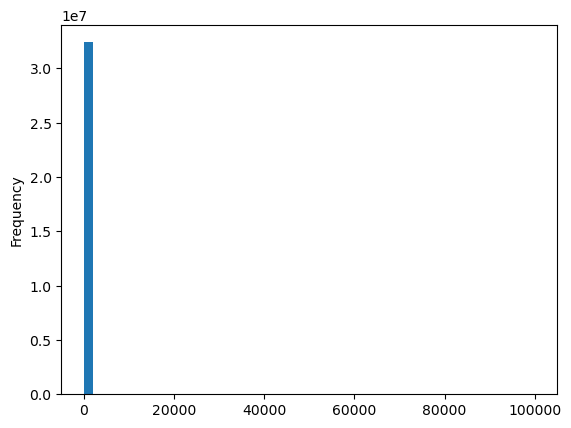

In [13]:
df['prices'].plot.hist(bins = 50)

In [ ]:
hist = df_small['prices'].plot.hist(bins = 25)

In [ ]:
# renaming outstanding values to nan

In [16]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [17]:
df['prices'].max()

25.0

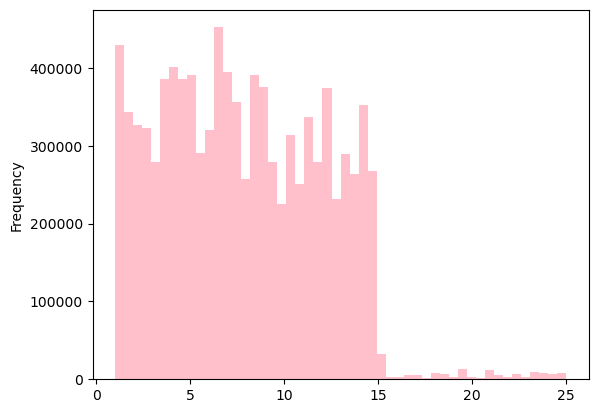

In [65]:
hist = df_small['prices'].plot.hist(bins = 50, color =['pink'])

In [27]:
# exporting histogram as png

In [24]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_cust_ord_prod.png'))

In [28]:
# creating scatterplot

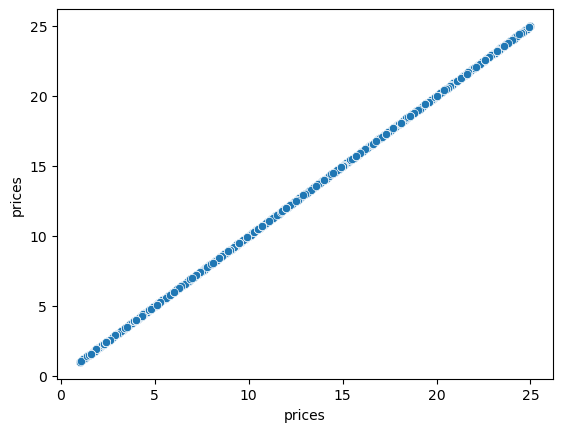

In [48]:
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_small)

In [53]:
# exporting scatterplot to png

In [31]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_cust_ord_prod.png'))

In [45]:
# creating dataframe of small sample


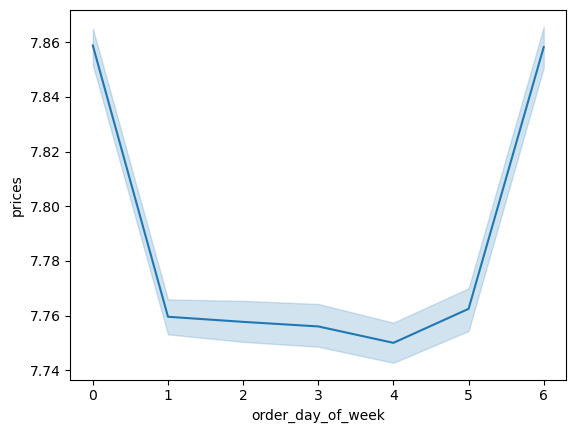

In [44]:
lineplot = sns.lineplot(data = df_small, x = 'order_day_of_week',y = 'prices')

In [46]:
lineplot.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_cust_ord_prod.png' ))

# histogram of the “order_hour_of_day” (step 3)

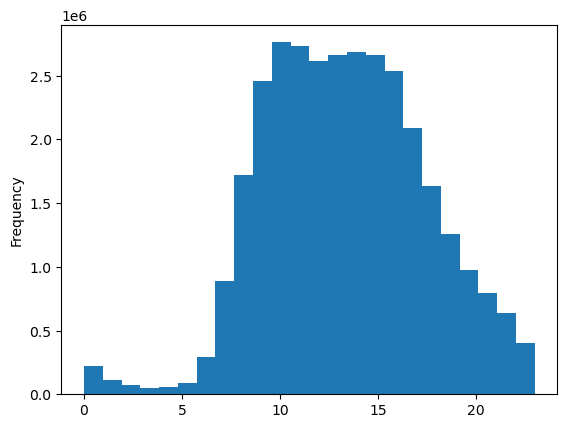

In [47]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

The number on x axix represent 24 hours. The peak falls between 10 and 17. Therefore the most sales appens during classic office hours: 10am-17pm.

In [52]:
# exporting histogram to png

In [51]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_24h_cust_ord_prod.png.png'))

# “loyalty_flag” (step 4)

In [54]:
# creating loyalty flag

In [55]:
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [57]:
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'loyal customer'

In [58]:
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'new customer'

In [60]:
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'regular customer'

In [61]:
df['loyalty_flag'].value_counts(dropna = False)

regular customer    15877395
loyal customer      10284396
new customer         6244250
Name: loyalty_flag, dtype: int64

In [62]:
df.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,mean_days,frequency_flag,last_name,Gender,state,Age,date_joined,Dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


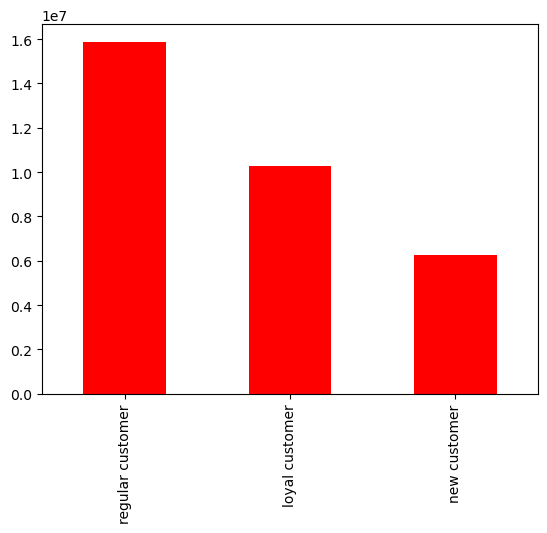

In [64]:
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color =['red'])

In [66]:
# exporting bar chart

In [67]:
loyalty_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'loyalty_bar_cust_ord_prod.png.png' ))

# difference in expenditure  (step 5)

In [68]:
df_small_2 = small[['prices', 'order_hour_of_day'] ]

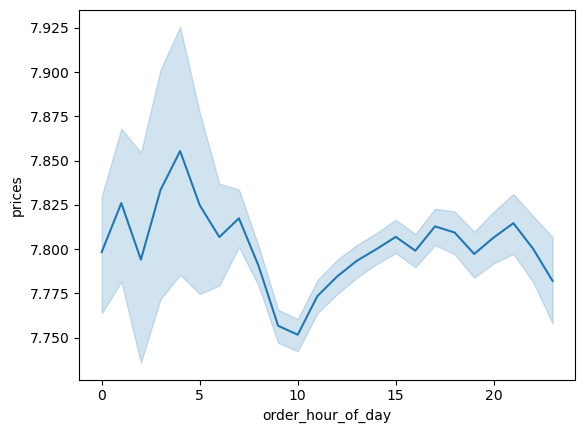

In [69]:
line_plot = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

In [70]:
line_plot.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_plot_cust_ord_prod.png.png.png' ))

In [72]:
df_small_3 = small[['Age', 'Dependants']]

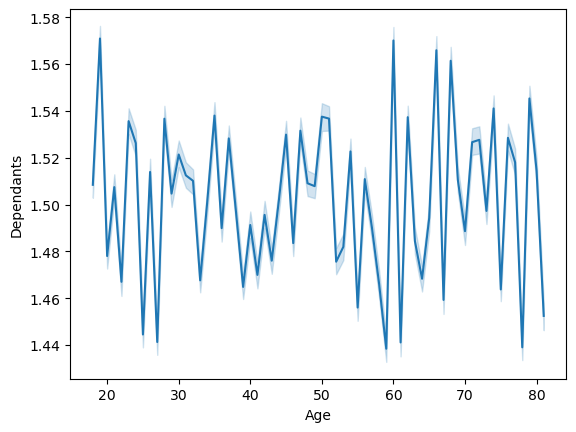

In [73]:
line_plot_age = sns.lineplot (data = df_small_3, x = 'Age', y = 'Dependants')

There is no clear trend that would show dependency between number of departments and age. 

In [74]:
# exporting line chart

In [ ]:
line_plot_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'line_plot_age_cust_ord_prod.png'))

# age and spending power (step 7)

In [77]:
# creating scatterplot

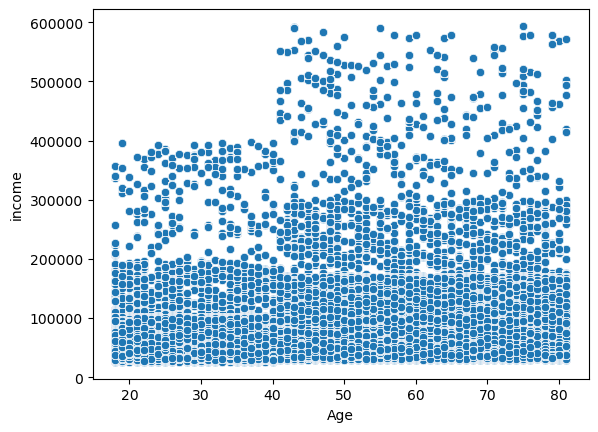

In [76]:
scatter_income = sns.scatterplot(data = df, x= 'Age', y = 'income')

The scatterplot shows that customers of all age groups the most often have income up to 200K. The income grows with the age: customers younger than 40yo do not get income above 400K when those who passed this age threshold often do. 

In [78]:
# exporting scatterplot

In [81]:
scatter_income.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'scatter_income_cust_ord_prod.png'))

# exporting pickle

In [83]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','charts_cust_ord_prod.pkl'))